In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
data=pd.read_csv("company_analytics.csv")
print(data)

    EmployeeID Department  Age Gender  Salary  YearsAtCompany  Projects  \
0          101  Marketing   49      F   42049               8         5   
1          102    Finance   19      M   71616              14         4   
2          103         IT   30      F   78191              14         2   
3          104    Finance   29      F   60932              12         2   
4          105    Finance   33      F   69855               3         5   
..         ...        ...  ...    ...     ...             ...       ...   
95         196         IT   43      F   63355               1         7   
96         197    Finance   45      F   62009              14         7   
97         198         HR   30      M   64376              14         6   
98         199         HR   41      F   44780              14         5   
99         200      Sales   38      F   42368               4         4   

    Sales (in $)  HoursWorked  PerformanceScore  
0              0          178               3.2  

## shape of data

In [3]:
print(data.shape)


(100, 10)


## average sallary of employess

In [4]:
print(data["Salary"].mean())

58364.41


## which department has higest salary

In [5]:
print(data["Salary"].max())

79974


## How many male vs female employees are there?

In [6]:
print(data["Gender"].value_counts())

Gender
F    53
M    47
Name: count, dtype: int64


## What is the youngest and oldest employee’s age?

In [7]:
# Minimum age per department
min_age_dept = data.groupby("Department")["Age"].min()

# Maximum age per department
max_age_dept = data.groupby("Department")["Age"].max()

print("Minimum Age by Department:")
print(min_age_dept)

print("\nMaximum Age by Department:")
print(max_age_dept)

# Department with the youngest employee
youngest_dept = min_age_dept.idxmin()
# Department with the oldest employee
oldest_dept = max_age_dept.idxmax()

print(f"\nYoungest employee is in: {youngest_dept} (age {min_age_dept.min()})")
print(f"Oldest employee is in: {oldest_dept} (age {max_age_dept.max()})")


Minimum Age by Department:
Department
Finance      22
HR           22
IT           22
Marketing    22
Sales        22
Name: Age, dtype: int64

Maximum Age by Department:
Department
Finance      49
HR           49
IT           49
Marketing    49
Sales        49
Name: Age, dtype: int64

Youngest employee is in: Finance (age 22)
Oldest employee is in: Finance (age 49)


## Which department has the most employees?

In [8]:
depart=data["Department"].max()
print(f' {depart} Department has most employess') 

 Sales Department has most employess


# Salary & Career Growth

### Is there a correlation between years at company and salary?

Correlation between YearsAtCompany and Salary: 0.13035358890040236


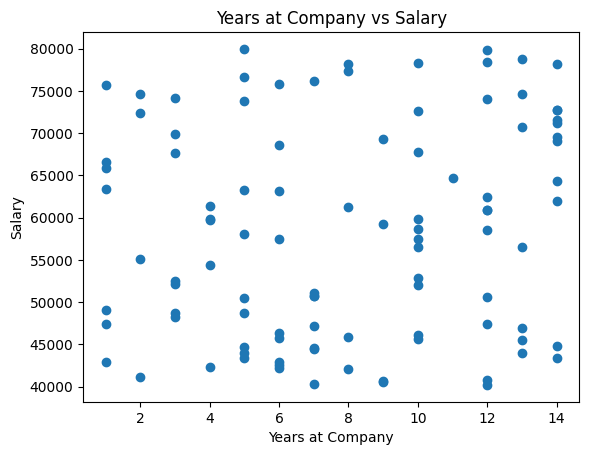

In [9]:
corr=data["YearsAtCompany"].corr(data["Salary"])
print("Correlation between YearsAtCompany and Salary:", corr)

plt.scatter(data['YearsAtCompany'],data["Salary"])
plt.xlabel("Years at Company")
plt.ylabel("Salary")
plt.title("Years at Company vs Salary")
plt.show()

## Do employees with more projects earn more on average?


In [ ]:
avg_salary_project=data.groupby("Projects")['Salary'].mean().sort_index()
print(avg_salary_project)



Projects
1    62290.642857
2    60278.727273
3    60422.076923
4    54929.294118
5    55437.105263
6    56661.833333
7    58408.777778
Name: Salary, dtype: float64


Which department has the highest-paid employee?``

In [12]:
higest_paid_department=data.groupby("Department")["Salary"].max()
print(higest_paid_department)

Department
Finance      79790
HR           75743
IT           78467
Marketing    79974
Sales        78754
Name: Salary, dtype: int64


What is the median salary per department?

In [14]:
medain_salary_per_department=data.groupby("Department")["Salary"].median()
print(medain_salary_per_department)

Department
Finance      61357.0
HR           47158.0
IT           56870.0
Marketing    60536.5
Sales        59166.5
Name: Salary, dtype: float64


How does salary vary by gender in each department?

In [ ]:
salary_vary_By_gender=data.groupby(["Department","Gender"])["Salary"].mean()
print(salary_vary_By_gender)                                                                         

Department  Gender
Finance     F         62422.272727
            M         60118.750000
HR          F         54825.000000
            M         53041.454545
IT          F         59348.625000
            M         54777.375000
Marketing   F         56938.642857
            M         61849.666667
Sales       F         60250.400000
            M         60286.375000
Name: Salary, dtype: float64


### Do employees with more years at the company tend to handle more projects?

In [18]:
corr_year_project_tend=data["YearsAtCompany"].corr(data["Projects"])

print("Correlation between YearsAtCompany and Projects:",corr_year_project_tend)

Correlation between YearsAtCompany and Projects: 0.0933157825701538


# Productivity & Engagement


### Which department has the most experienced employees (highest avg. years)?

In [26]:
department_with_experince_of_employee=data.groupby("Department")["YearsAtCompany"].max()
print(department_with_experince_of_employee)


Department
Finance      14
HR           14
IT           14
Marketing    14
Sales        13
Name: YearsAtCompany, dtype: int64


### Which department has the youngest workforce?

In [38]:

youngest_emp = data.groupby("Department")["Age"].min()
dept_youngest = youngest_emp.idxmin()
age_youngest = youngest_emp.min()
print(f"{dept_youngest} department has the youngest workforce (age {age_youngest})")


Finance department has the youngest workforce (age 19)


### Compare salary distribution between IT, Finance, Sales, etc.

<Figure size 800x600 with 0 Axes>

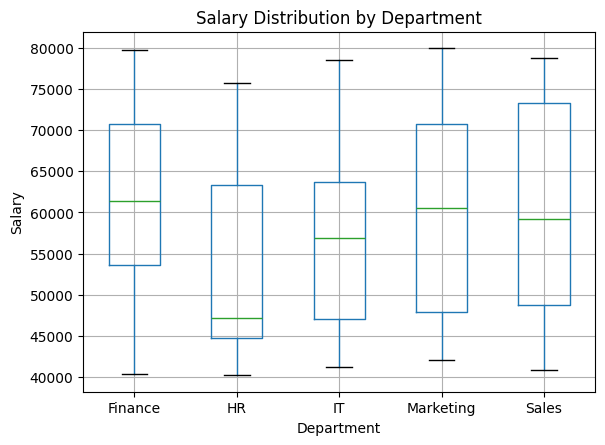

In [40]:
# ...existing code...
plt.figure(figsize=(8, 6))
data.boxplot(column="Salary", by="Department")
plt.title("Salary Distribution by Department")
plt.suptitle("")  # Removes the default title
plt.xlabel("Department")
plt.ylabel("Salary")
plt.show()
# ...existing code...

### Which department has the largest gender gap in salary?


In [43]:
avg_salary = data.groupby(["Department", "Gender"])["Salary"].mean().unstack()

# Step 2: Calculate the absolute gender gap in salary
avg_salary["Gap"] = (avg_salary["M"] - avg_salary["F"]).abs()

# Step 3: Find department with max gap
largest_gap_dept = avg_salary["Gap"].idxmax()
largest_gap_value = avg_salary["Gap"].max()

print("Department with largest gender gap:", largest_gap_dept)
print("Gap amount:", largest_gap_value)
print("\nFull table:\n", avg_salary)


Department with largest gender gap: Marketing
Gap amount: 4911.023809523809

Full table:
 Gender                 F             M          Gap
Department                                         
Finance     62422.272727  60118.750000  2303.522727
HR          54825.000000  53041.454545  1783.545455
IT          59348.625000  54777.375000  4571.250000
Marketing   56938.642857  61849.666667  4911.023810
Sales       60250.400000  60286.375000    35.975000
